# Import Necessary Liabraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# For interactive visualizations
import plotly.express as px


In [2]:
# Load the dataset
data = pd.read_csv("2019-Nov.csv")

In [4]:
data.head(10) #display first 10 rows of the data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


# Understanding Data

In [5]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [7]:
df.shape

(67501979, 9)

In [10]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [8]:
df.describe()

,product_id,category_id,price,user_id
count,6.750198e+07,6.750198e+07,6.750198e+07,6.750198e+07
mean,1.251406e+07,2.057898e+18,2.924593e+02,5.386397e+08
std,1.725741e+07,2.012549e+16,3.556745e+02,2.288516e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.305977e+06,2.053014e+18,6.924000e+01,5.164762e+08
50%,5.100568e+06,2.053014e+18,1.657700e+02,5.350573e+08
75%,1.730075e+07,2.053014e+18,3.603400e+02,5.610794e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


# Data Cleaning

In [11]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64


In [16]:
# Fill missing category_code with "unknown"
data['category_code'].fillna('unknown', inplace=True)

# Drop rows with missing brand values (or choose another strategy if necessary)
data.dropna(subset=['brand'], inplace=True)

# Remove rows with invalid price values
data = data[data['price'] > 0]

# Remove duplicates
data.drop_duplicates(inplace=True)

In [17]:
# Verify dataset after cleaning
print("\nDataset Info After Cleaning:")
print(data.info())
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 58186451 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.3+ GB
None

Missing Values After Cleaning:
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     8
dtype: int64


In [18]:
# Drop rows with missing user_session values
data = data.dropna(subset=['user_session'])

# Verify
print("\nMissing Values After Dropping Rows:")
print(data.isnull().sum())



Missing Values After Dropping Rows:
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


# Optimize Memory Usage

In [19]:
# Optimize data types
data['price'] = data['price'].astype('float32')
data['product_id'] = data['product_id'].astype('int32')
data['user_id'] = data['user_id'].astype('int32')
data['category_id'] = data['category_id'].astype('int64')

# Verify memory usage
print("\nOptimized Dataset Memory Usage:")
print(data.info())



Optimized Dataset Memory Usage:
<class 'pandas.core.frame.DataFrame'>
Index: 58186443 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int32  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float32
 7   user_id        int32  
 8   user_session   object 
dtypes: float32(1), int32(2), int64(1), object(5)
memory usage: 3.7+ GB
None


# Data Enrichment

In [20]:
# Convert event_time to datetime
data['event_time'] = pd.to_datetime(data['event_time'].str.replace(" UTC", ""))


In [21]:
# Add temporal features
data['hour'] = data['event_time'].dt.hour
data['day'] = data['event_time'].dt.day
data['weekday'] = data['event_time'].dt.weekday
data['month'] = data['event_time'].dt.month

In [23]:
# Behavioral feature: click-to-purchase ratio
purchase_counts = data[data['event_type'] == 'purchase'].groupby('user_id').size()
view_counts = data[data['event_type'] == 'view'].groupby('user_id').size()
data['click_to_purchase'] = data['user_id'].map(purchase_counts) / data['user_id'].map(view_counts)

In [24]:
# Fill any resulting NaNs with 0
data['click_to_purchase'].fillna(0, inplace=True)

In [25]:
# Verify enriched dataset
print("\nDataset Info After Enrichment:")
print(data.info())
print("\nSample After Enrichment:")
print(data.head())


Dataset Info After Enrichment:
<class 'pandas.core.frame.DataFrame'>
Index: 58186443 entries, 0 to 67501978
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   event_time         datetime64[ns]
 1   event_type         object        
 2   product_id         int32         
 3   category_id        int64         
 4   category_code      object        
 5   brand              object        
 6   price              float32       
 7   user_id            int32         
 8   user_session       object        
 9   hour               int32         
 10  day                int32         
 11  weekday            int32         
 12  month              int32         
 13  click_to_purchase  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(6), int64(1), object(4)
memory usage: 5.0+ GB
None

Sample After Enrichment:
           event_time event_type  product_id          category_id  \
0 2019-11-01 00:00:00       vie

# Data Visualization

## Distribution of Event Types

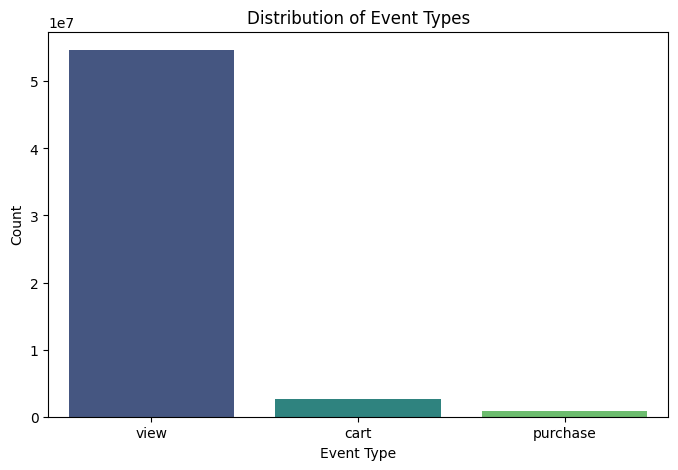

In [26]:
# Count plot for event types
event_counts = data['event_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="viridis")
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


## Top 10 Most Interacted Brands

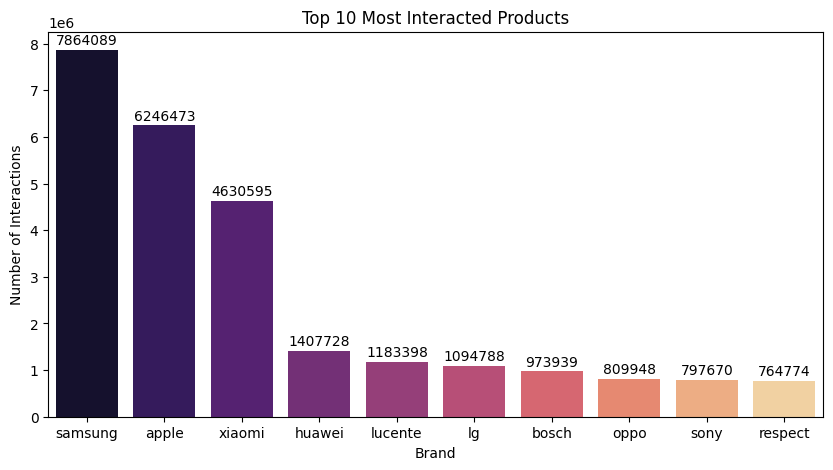

In [32]:
# Top 10 most interacted products
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=top_products.index, y=top_products.values, palette="magma")

# Annotate each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000, 
             int(bar.get_height()), ha='center', va='bottom')

plt.title("Top 10 Most Interacted Products")
plt.xlabel("Brand")
plt.ylabel("Number of Interactions")
plt.show()



## Temporal Trends

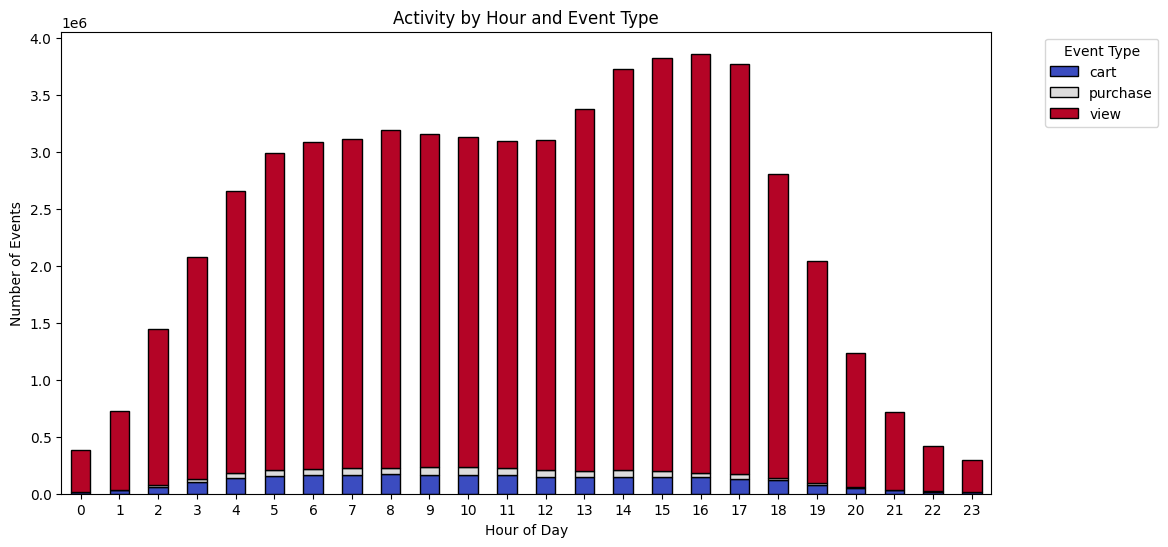

In [31]:
# Stacked bar plot of activity by hour and event type
hourly_event_type = data.groupby(['hour', 'event_type'])['event_type'].count().unstack()

hourly_event_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm', edgecolor='black')
plt.title("Activity by Hour and Event Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


## Category Popularity

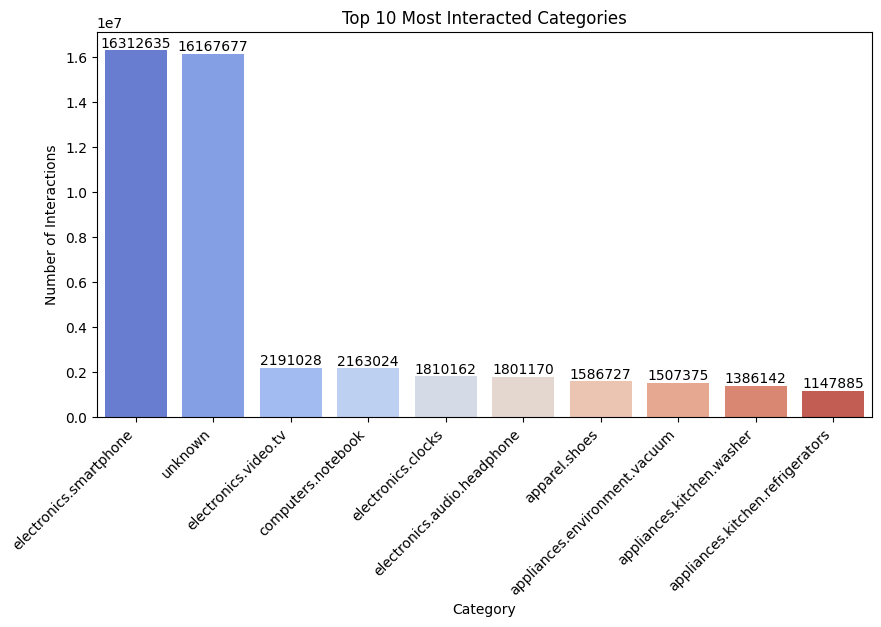

In [33]:
# Count interactions by category
top_categories = data['category_code'].value_counts().head(10)

# Plot the top 10 categories
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")

# Annotate bars with interaction counts
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, 
             int(bar.get_height()), ha='center', va='bottom')

# Customize the chart
plt.title("Top 10 Most Interacted Categories")
plt.xlabel("Category")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()


## User Engagement

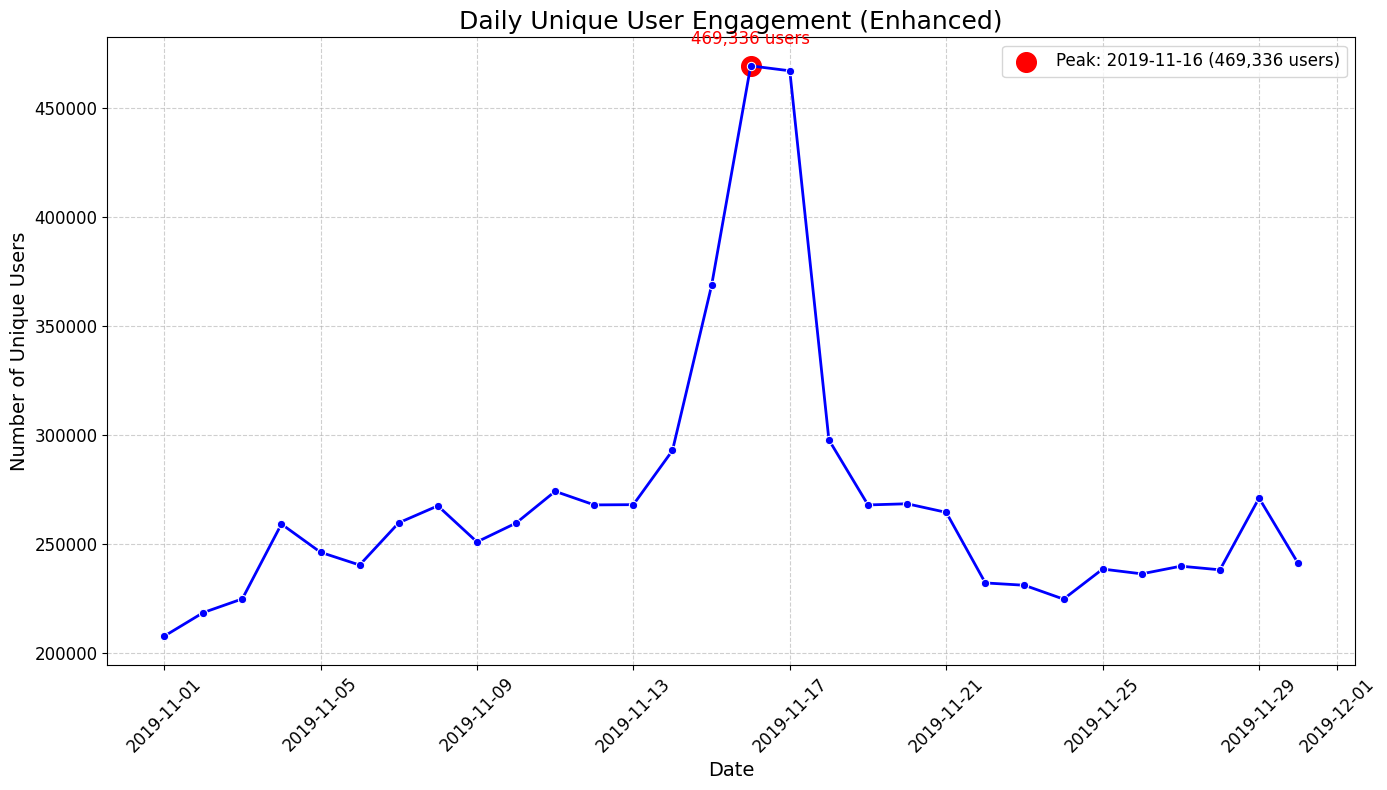

In [35]:
# Aggregate daily user activity

# Define the figure
plt.figure(figsize=(14, 8))

# Plot with enhanced markers and smoother line
sns.lineplot(x=daily_activity.index, y=daily_activity.values, marker='o', color='blue', linewidth=2)

# Highlight the peak point
peak_date = daily_activity.idxmax()
peak_value = daily_activity.max()
plt.scatter(peak_date, peak_value, color='red', s=200, label=f"Peak: {peak_date} ({peak_value:,} users)")

# Add annotations for the peak
plt.text(peak_date, peak_value + 10000, f"{peak_value:,} users", color='red', fontsize=12, ha='center')

# Customize the chart
plt.title("Daily Unique User Engagement (Enhanced)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Unique Users", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



# Feature Engineering

## Extract Temporal Features

In [37]:
# Check the type of 'event_time' column
print(data['event_time'].dtype)

# If it's not in datetime format, convert it
if not np.issubdtype(data['event_time'].dtype, np.datetime64):
    data['event_time'] = pd.to_datetime(data['event_time'])

# Extract temporal features
data['day_of_week'] = data['event_time'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['event_time'].dt.hour
data['month'] = data['event_time'].dt.month
data['day'] = data['event_time'].dt.day

# Verify the extracted features
print(data[['event_time', 'day_of_week', 'hour', 'month', 'day']].head())


datetime64[ns]
           event_time  day_of_week  hour  month  day
0 2019-11-01 00:00:00            4     0     11    1
1 2019-11-01 00:00:00            4     0     11    1
2 2019-11-01 00:00:01            4     0     11    1
3 2019-11-01 00:00:01            4     0     11    1
4 2019-11-01 00:00:01            4     0     11    1


## Create Behavioral Metrics

In [38]:
# Create a DataFrame for purchase events only
purchase_data = data[data['event_type'] == 'purchase']

# Average Order Value (AOV) per user
aov = purchase_data.groupby('user_id')['price'].mean().reset_index()
aov.rename(columns={'price': 'avg_order_value'}, inplace=True)

# Add AOV back to the main dataset
data = data.merge(aov, on='user_id', how='left')

# Time Between Purchases (in hours)
purchase_data = purchase_data.sort_values(by=['user_id', 'event_time'])
purchase_data['time_diff'] = purchase_data.groupby('user_id')['event_time'].diff().dt.total_seconds() / 3600

# Average time between purchases per user
time_between_purchases = purchase_data.groupby('user_id')['time_diff'].mean().reset_index()
time_between_purchases.rename(columns={'time_diff': 'avg_time_between_purchases'}, inplace=True)

# Add the metric back to the main dataset
data = data.merge(time_between_purchases, on='user_id', how='left')

# Check the behavioral metrics
print(data[['user_id', 'avg_order_value', 'avg_time_between_purchases']].head())


     user_id  avg_order_value  avg_time_between_purchases
0  520088904              NaN                         NaN
1  530496790              NaN                         NaN
2  561587266       112.279999                   80.192778
3  518085591              NaN                         NaN
4  558856683              NaN                         NaN


## Transform Categorical Features

In [39]:
# One-hot encoding for 'day_of_week'
day_of_week_dummies = pd.get_dummies(data['day_of_week'], prefix='day')
data = pd.concat([data, day_of_week_dummies], axis=1)

# Label encoding for 'category_code' (high-cardinality feature)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['category_code_encoded'] = le.fit_transform(data['category_code'])

# Check encoded features
print(data[['day_of_week', 'category_code', 'category_code_encoded']].head())


   day_of_week              category_code  category_code_encoded
0            4     electronics.smartphone                    100
1            4  appliances.sewing_machine                     54
2            4                    unknown                    129
3            4  appliances.kitchen.washer                     50
4            4     electronics.smartphone                    100


# Exploratory Data Analysis (EDA)

## Temporal Analysis

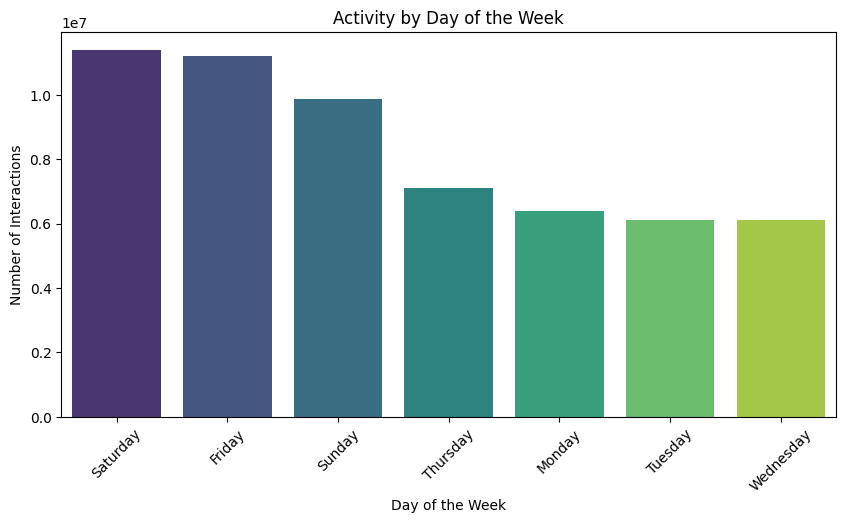

In [41]:
# Create a mapping for day_of_week to day names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map numerical day_of_week to day names
data['day_of_week_name'] = data['day_of_week'].map(day_mapping)

# Activity by day of the week (using day names)
plt.figure(figsize=(10, 5))
sns.barplot(x=data['day_of_week_name'].value_counts().index, 
            y=data['day_of_week_name'].value_counts().values, 
            palette='viridis')
plt.title("Activity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()


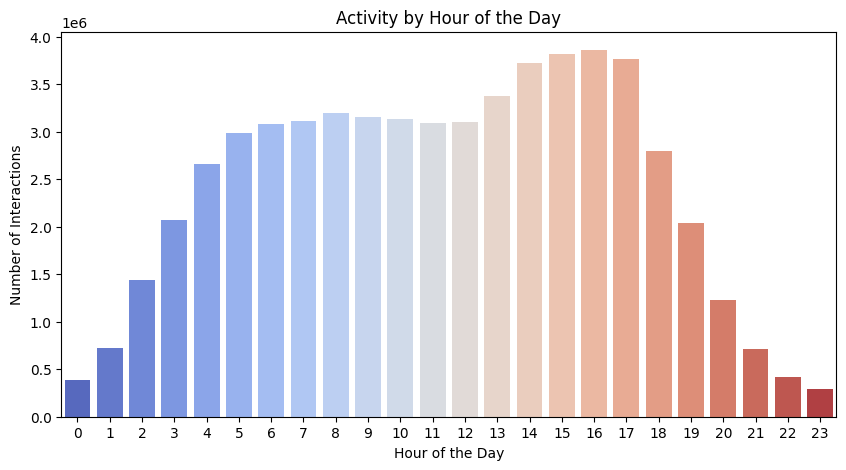

In [42]:
# Activity by hour of the day
plt.figure(figsize=(10, 5))
sns.barplot(x=data['hour'].value_counts().index, 
            y=data['hour'].value_counts().values, 
            palette='coolwarm')
plt.title("Activity by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Interactions")
plt.show()

## Behavioral Metrics Analysis

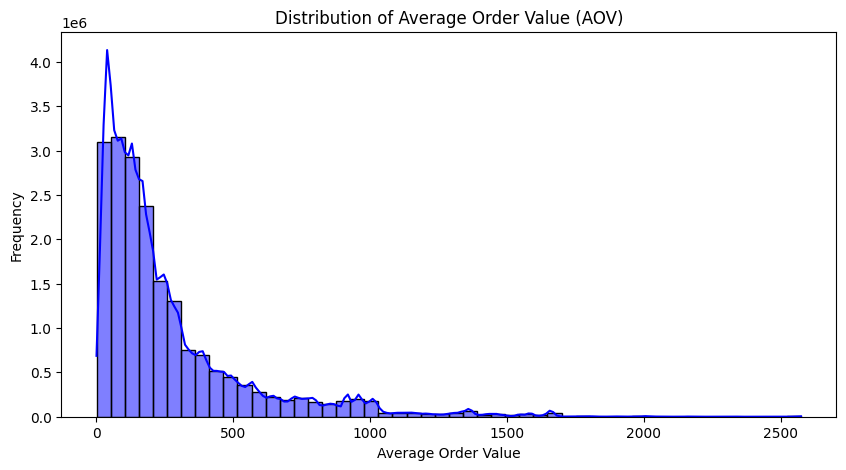

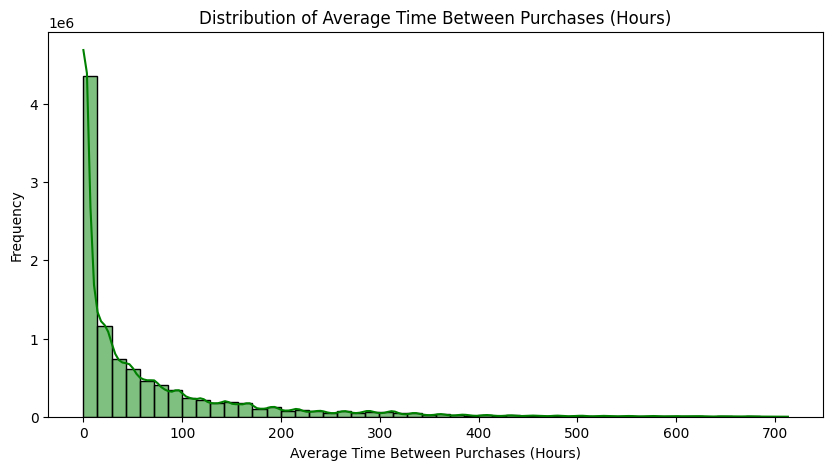

In [43]:
# Distribution of Average Order Value (AOV)
plt.figure(figsize=(10, 5))
sns.histplot(data['avg_order_value'], bins=50, kde=True, color='blue')
plt.title("Distribution of Average Order Value (AOV)")
plt.xlabel("Average Order Value")
plt.ylabel("Frequency")
plt.show()

# Distribution of Time Between Purchases
plt.figure(figsize=(10, 5))
sns.histplot(data['avg_time_between_purchases'], bins=50, kde=True, color='green')
plt.title("Distribution of Average Time Between Purchases (Hours)")
plt.xlabel("Average Time Between Purchases (Hours)")
plt.ylabel("Frequency")
plt.show()


## Category-Level Analysis

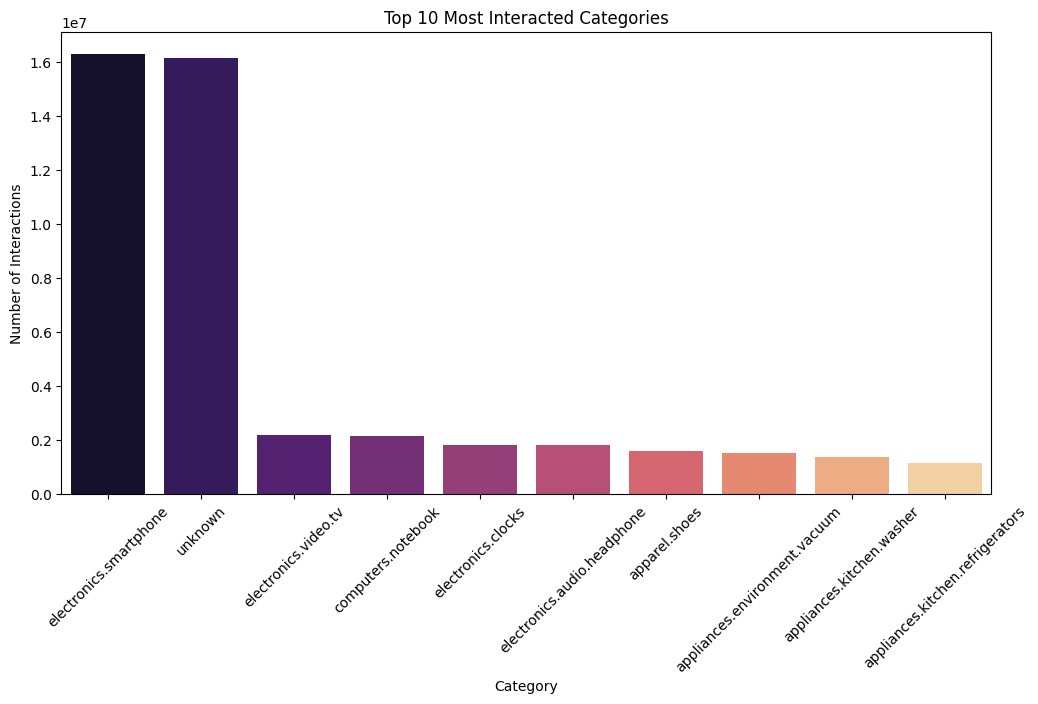

In [44]:
# Top 10 most interacted categories
top_categories = data['category_code'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')
plt.title("Top 10 Most Interacted Categories")
plt.xlabel("Category")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.show()

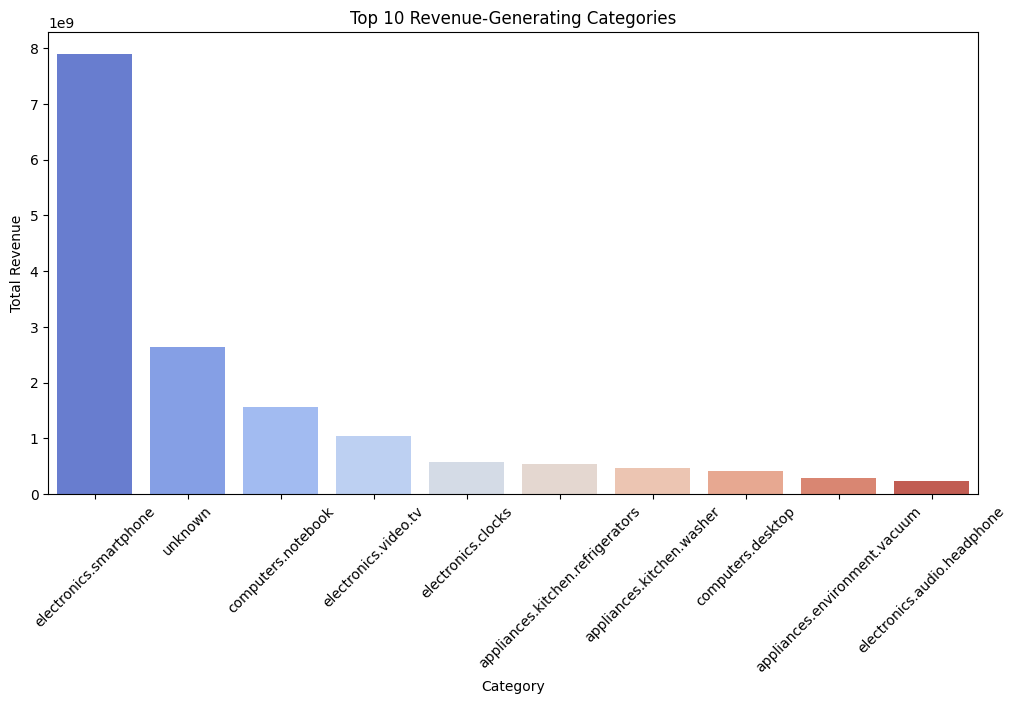

In [45]:
# Top 10 revenue-generating categories
category_revenue = data.groupby('category_code')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='coolwarm')
plt.title("Top 10 Revenue-Generating Categories")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

## User Engagement

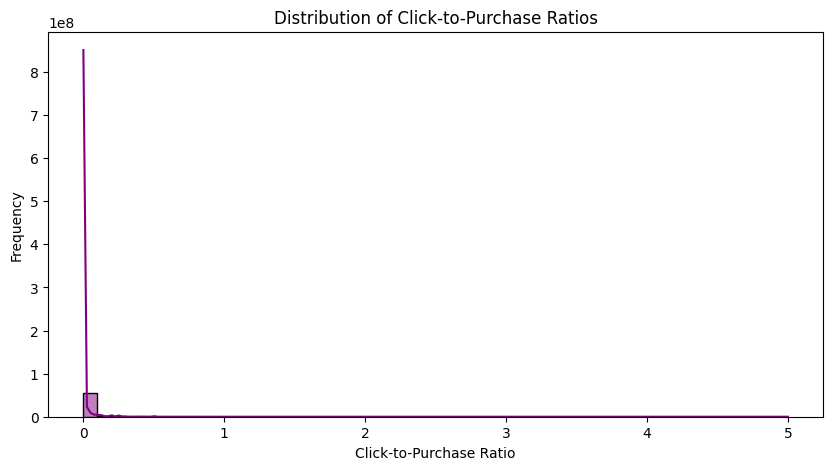

In [47]:
# Distribution of Click-to-Purchase Ratio
plt.figure(figsize=(10, 5))
sns.histplot(data['click_to_purchase'], bins=50, kde=True, color='purple')
plt.title("Distribution of Click-to-Purchase Ratios")
plt.xlabel("Click-to-Purchase Ratio")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Recreate session_interactions by counting events in each session
session_counts = data.groupby('user_session')['event_type'].count()
data['session_interactions'] = data['user_session'].map(session_counts)


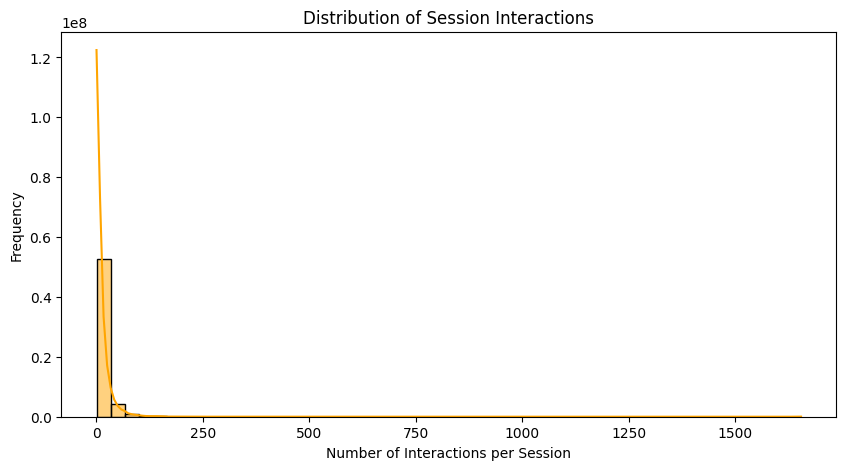

In [50]:
# Plot the distribution of session interactions
plt.figure(figsize=(10, 5))
sns.histplot(data['session_interactions'], bins=50, kde=True, color='orange')
plt.title("Distribution of Session Interactions")
plt.xlabel("Number of Interactions per Session")
plt.ylabel("Frequency")
plt.show()


## Correlation

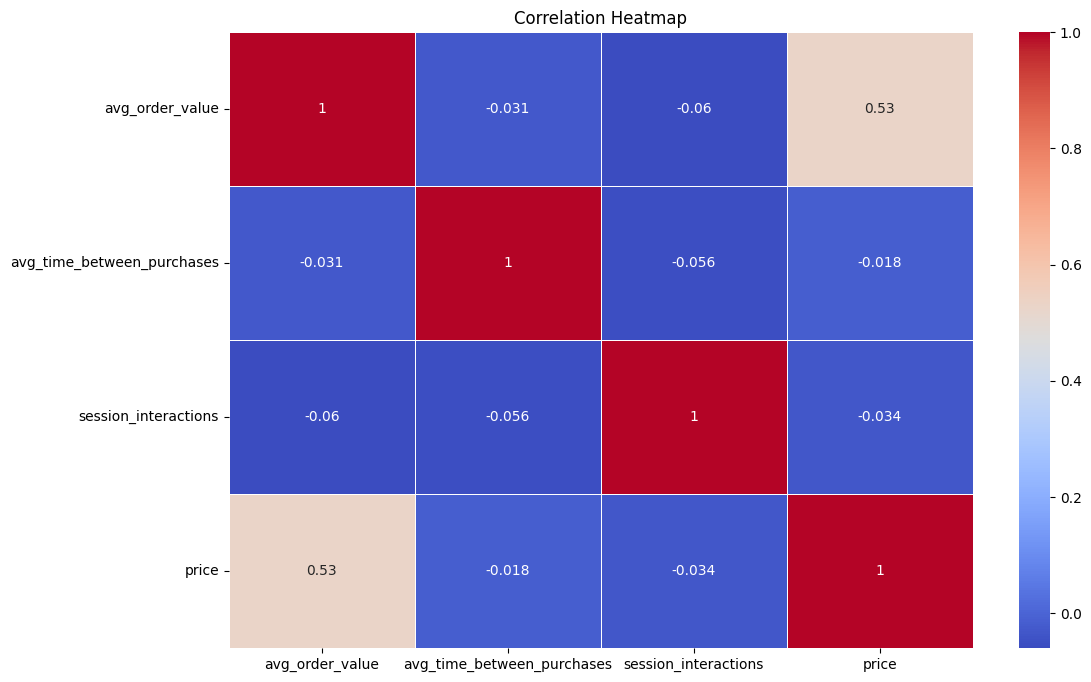

In [51]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[['avg_order_value', 'avg_time_between_purchases', 'session_interactions', 'price']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
